En este código se toman las ventanas admitidas calculadas anteriormente, y se realizan distintas visualizaciones de interés.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/repo_tesis/entorno_tesis_Molina"
!source bin/activate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/repo_tesis/entorno_tesis_Molina


# Importar librerías y datos

Importo las librerías

In [2]:
# !pip install lmoments3

import numpy as np
import pickle
import joblib
import pandas as pd
import sys
import matplotlib.pyplot as plt

# sys.path.append("/content/drive/My Drive/repo_tesis/lib")
# import functions as f

Levanto los datos

In [3]:
%cd "/content/drive/My Drive/repo_tesis/src/gesto_reposo/datos"
ventanas_admitidas = joblib.load("ventanas_admitidas_50_50.pkl")  # inicio, fin, id_rep, id_gesto,
data = joblib.load("data_ventanas_admitidas_50_50.pkl") # los 16 canales de la info
label = joblib.load("label_ventanas_admitidas_50_50.pkl") # arreglo 1D con los label de cada muestra

# features y labels
label_completa = joblib.load("label_W200_I50_50_50.joblib")
features = joblib.load("FEATURES_W200_I50_50_50.joblib")

/content/drive/My Drive/repo_tesis/src/gesto_reposo/datos


# Armado de diccionarios a partir de las señales

In [ ]:
# Visualizo estructira de ventanas_admitidas
print(ventanas_admitidas)

# En las primeras dos columnas tengo los principios y fin de cada ventana
# en la tercera el identificador de repetición
# en la cuarta el gesto (0-12, 0 inclusive)
# en la quinta el sujeto (1-10)

[[    950     990       0       1       1]
 [    960    1000       0       1       1]
 [    970    1010       0       1       1]
 ...
 [1446590 1446630    1419       0      10]
 [1446600 1446640    1419       0      10]
 [1446610 1446650    1419       0      10]]


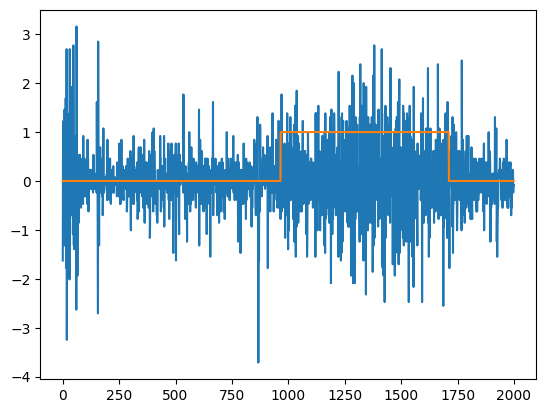

In [ ]:
# Visualización de una repetición junto con su label
plt.figure()
plt.plot(data[0:2000, 0], )
plt.plot(label[0:2000])

In [ ]:
ventanas_gesto_ind = np.where(ventanas_admitidas[:, 3]!=0)[0]
ventanas_reposo_ind = np.where(ventanas_admitidas[:, 3]==0)[0]

In [ ]:
# para chequear la proporcion de ventanas de reposo y gesto
print(len(ventanas_reposo_ind), len(ventanas_gesto_ind))

59563 59563


In [ ]:
pd.DataFrame(ventanas_admitidas)

,0,1,2,3,4
0,950,990,0,1,1
1,960,1000,0,1,1
2,970,1010,0,1,1
3,980,1020,0,1,1
4,990,1030,0,1,1
...,...,...,...,...,...
119121,1446570,1446610,1419,0,10
119122,1446580,1446620,1419,0,10
119123,1446590,1446630,1419,0,10
119124,1446600,1446640,1419,0,10


In [4]:
# en primer lugar voy a calcular gesto representativo por sujeto. luego puedo evaluar combinar los de diferentes sujetos
cant_gestos = 13  # contando el reposo
cant_sujetos = 10

# separacion por ventana
sep_gesto_sujeto = []   # separo ventanas_admitidas por gesto y sujeto
data_gesto_sujeto = []  # igual a sep_gesto_sujeto, pero sustituyo cada dato de ventanas_admitidas por los datos que representan

# separacion por repeticion
sep_gesto_sujeto_xrep = []
data_gesto_sujeto_xrep = []


for i in range(1, cant_sujetos+1): # 11
  # datos crudos
  sep_gestos = []
  data_sep_gestos = []
  sep_gestos_xrep = []
  data_sep_gestos_xrep = []

  ind_sujeto = np.where(ventanas_admitidas[:, 4]==i)[0] # la columna 4 es la de los sujetos en ventanas_admitidas
  ventanas_sujeto = ventanas_admitidas[ind_sujeto]
  # print(ventanas_sujeto)  # esta bien
  for j in range(cant_gestos): # 13
    ind_gesto = np.where(ventanas_sujeto[:, 3]==j)[0] # # la columna 3 es la de los gestos en ventanas_admitidas
    ventanas_sujeto_gesto = ventanas_sujeto[ind_gesto]
    # print(ventanas_sujeto_gesto) # esta bien
    sep_gestos.append(ventanas_sujeto_gesto)
    id_rep = np.unique(ventanas_sujeto[ind_gesto, 2])
    # datos crudos
    sep_xrep = []
    data_sep_xrep = []

    for m in range(len(id_rep)):
      # print(id_rep)
      ind_rep = np.where(ventanas_sujeto_gesto[:, 2]==id_rep[m])[0]
      # print(ind_rep)
      ventanas_sujeto_gesto_rep = ventanas_sujeto_gesto[ind_rep]
      ini = ventanas_sujeto_gesto[ind_rep[0], 0]
      fin = ventanas_sujeto_gesto[ind_rep[-1], 1]
      sep_xrep.append([ventanas_sujeto_gesto_rep, ini, fin])
      data_sep_xrep.append(data[ini:fin, :])

    data_sep_gestos_aux = []  # fijo sujeto y tipo de gesto. vario entre los que caen en esas categorias
    for k in range(len(ind_gesto)):
      # inicio y fin del pedazo de señal que voy a guardar
      ini = ventanas_sujeto_gesto[k][0]
      fin = ventanas_sujeto_gesto[k][1]
      data_sep_gestos_aux.append(data[ini:fin, :])

    data_sep_gestos.append(data_sep_gestos_aux)

    sep_gestos_xrep.append(sep_xrep)
    data_sep_gestos_xrep.append(data_sep_xrep)

  sep_gesto_sujeto.append(sep_gestos)
  data_gesto_sujeto.append(data_sep_gestos)

  sep_gesto_sujeto_xrep.append(sep_gestos_xrep)
  data_gesto_sujeto_xrep.append(data_sep_gestos_xrep)


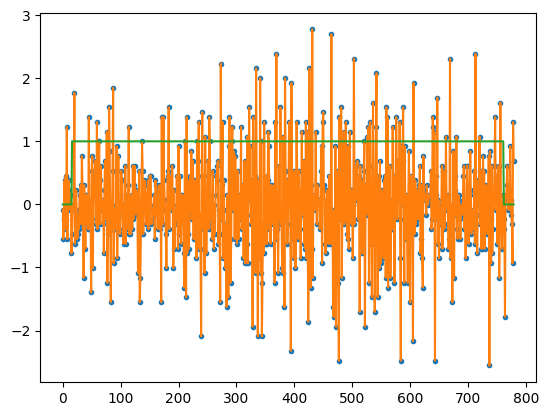

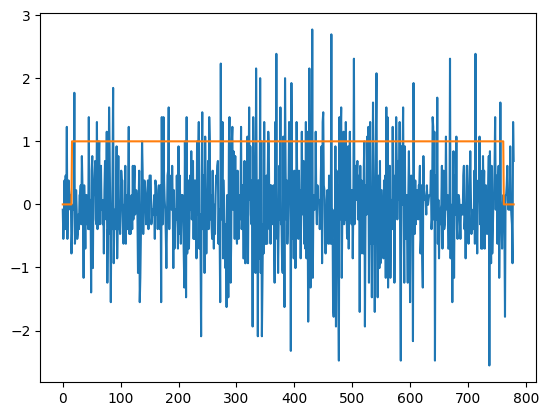

In [ ]:
# separacion por repeticion
# a = sep_gesto_sujeto_xrep[0][1]
# print(a)
a = data_gesto_sujeto_xrep[0][1][0]
b = sep_gesto_sujeto_xrep[0][1][0]
# print(b)
'''
primer subindice: sujeto
segundo subindice: gesto
tercer subindice: repeticion
'''
plt.figure()
plt.plot(data[950:1730, 0], '.')
plt.plot(label[950:1730])
plt.plot(a[:, 0])

# Visualización de una repetición junto con su label
plt.figure()
plt.plot(data[950:1730, 0])
plt.plot(label[950:1730])

In [ ]:
# cada lista corresponde a un sujeto distinto, y dentro de cada una de estas listas, cada lista corresponde a un gesto distinto
# sep_gesto_sujeto[0][1]

In [ ]:
'''
primer subindice: sujeto
segundo subindice: gesto
tercer subindice: fragmento de señal correspondiente ndarray(largo_ventana, 16) porque tiene 16 canales
'''
a = sep_gesto_sujeto_xrep[0][1]



In [5]:
# Transformamos a diccionario data_gesto_sujeto y sep_gesto_sujeto
data_gesto_sujeto_dict = {}
sep_gesto_sujeto_dict = {}

data_gesto_sujeto_xrep_dict = {}
sep_gesto_sujeto_xrep_dict = {}

# Llenamos el diccionario con los datos de la lista anidada
for i in range(cant_sujetos):  # 10 sujetos
    sujeto_key = f"sujeto_{i+1}"
    data_gesto_sujeto_dict[sujeto_key] = {}
    sep_gesto_sujeto_dict[sujeto_key] = {}
    data_gesto_sujeto_xrep_dict[sujeto_key] = {}
    sep_gesto_sujeto_xrep_dict[sujeto_key] = {}

    for j in range(cant_gestos):  # 13 gestos
        gesto_key = f"gesto_{j}"
        data_gesto_sujeto_dict[sujeto_key][gesto_key] = {}
        sep_gesto_sujeto_dict[sujeto_key][gesto_key] = {}
        data_gesto_sujeto_xrep_dict[sujeto_key][gesto_key] = {}
        sep_gesto_sujeto_xrep_dict[sujeto_key][gesto_key] = {}

        for k, ventana in enumerate(data_gesto_sujeto[i][j]):  # Cada ventana dentro de un gesto
            ventana_key = f"ventana_{k}"
            data_gesto_sujeto_dict[sujeto_key][gesto_key][ventana_key] = {}
            if isinstance(ventana, np.ndarray) and ventana.ndim == 2 and ventana.shape[1] == 16:  # Comprobamos que es un array 2D con 16 columnas
                for c in range(16):  # 16 canales
                    canal_key = f"canal_{c+1}"
                    # Asignamos cada columna del arreglo (40, 16) a una clave de canal
                    data_gesto_sujeto_dict[sujeto_key][gesto_key][ventana_key][canal_key] = ventana[:, c]
        for k, ventana in enumerate(sep_gesto_sujeto[i][j]):  # Cada ventana dentro de un gesto
            ventana_key = f"ventana_{k}"
            sep_gesto_sujeto_dict[sujeto_key][gesto_key][ventana_key] = ventana

        for k, repe in enumerate(data_gesto_sujeto_xrep[i][j]):  # Cada repetición dentro de un gesto
            repe_key = f"repeticion_{k}"
            data_gesto_sujeto_xrep_dict[sujeto_key][gesto_key][repe_key] = {}
            for canal in range(16):
                canal_key = f"canal_{canal+1}"
                data_gesto_sujeto_xrep_dict[sujeto_key][gesto_key][repe_key][canal_key] = repe[:, canal]

        for k, repe in enumerate(sep_gesto_sujeto_xrep[i][j]):  # Cada ventana dentro de un gesto
            repe_key = f"repeticion_{k}"
            sep_gesto_sujeto_xrep_dict[sujeto_key][gesto_key][repe_key] = repe


In [ ]:
prueba_acceso_dato_sep = sep_gesto_sujeto_xrep_dict["sujeto_1"]["gesto_1"]["repeticion_1"]
print(prueba_acceso_dato_sep)

In [ ]:
# Obtengo la info con sep_gesto_sujeto_dict y la señal con data_gesto_sujeto_dict usando los mismos indices
prueba_acceso_dato_sep = sep_gesto_sujeto_dict["sujeto_1"]["gesto_1"]["ventana_5"]
prueba_acceso_dato_data = data_gesto_sujeto_dict["sujeto_1"]["gesto_1"]["ventana_5"]["canal_3"]


In [ ]:
print()

# Cálculo y visualización por repetición

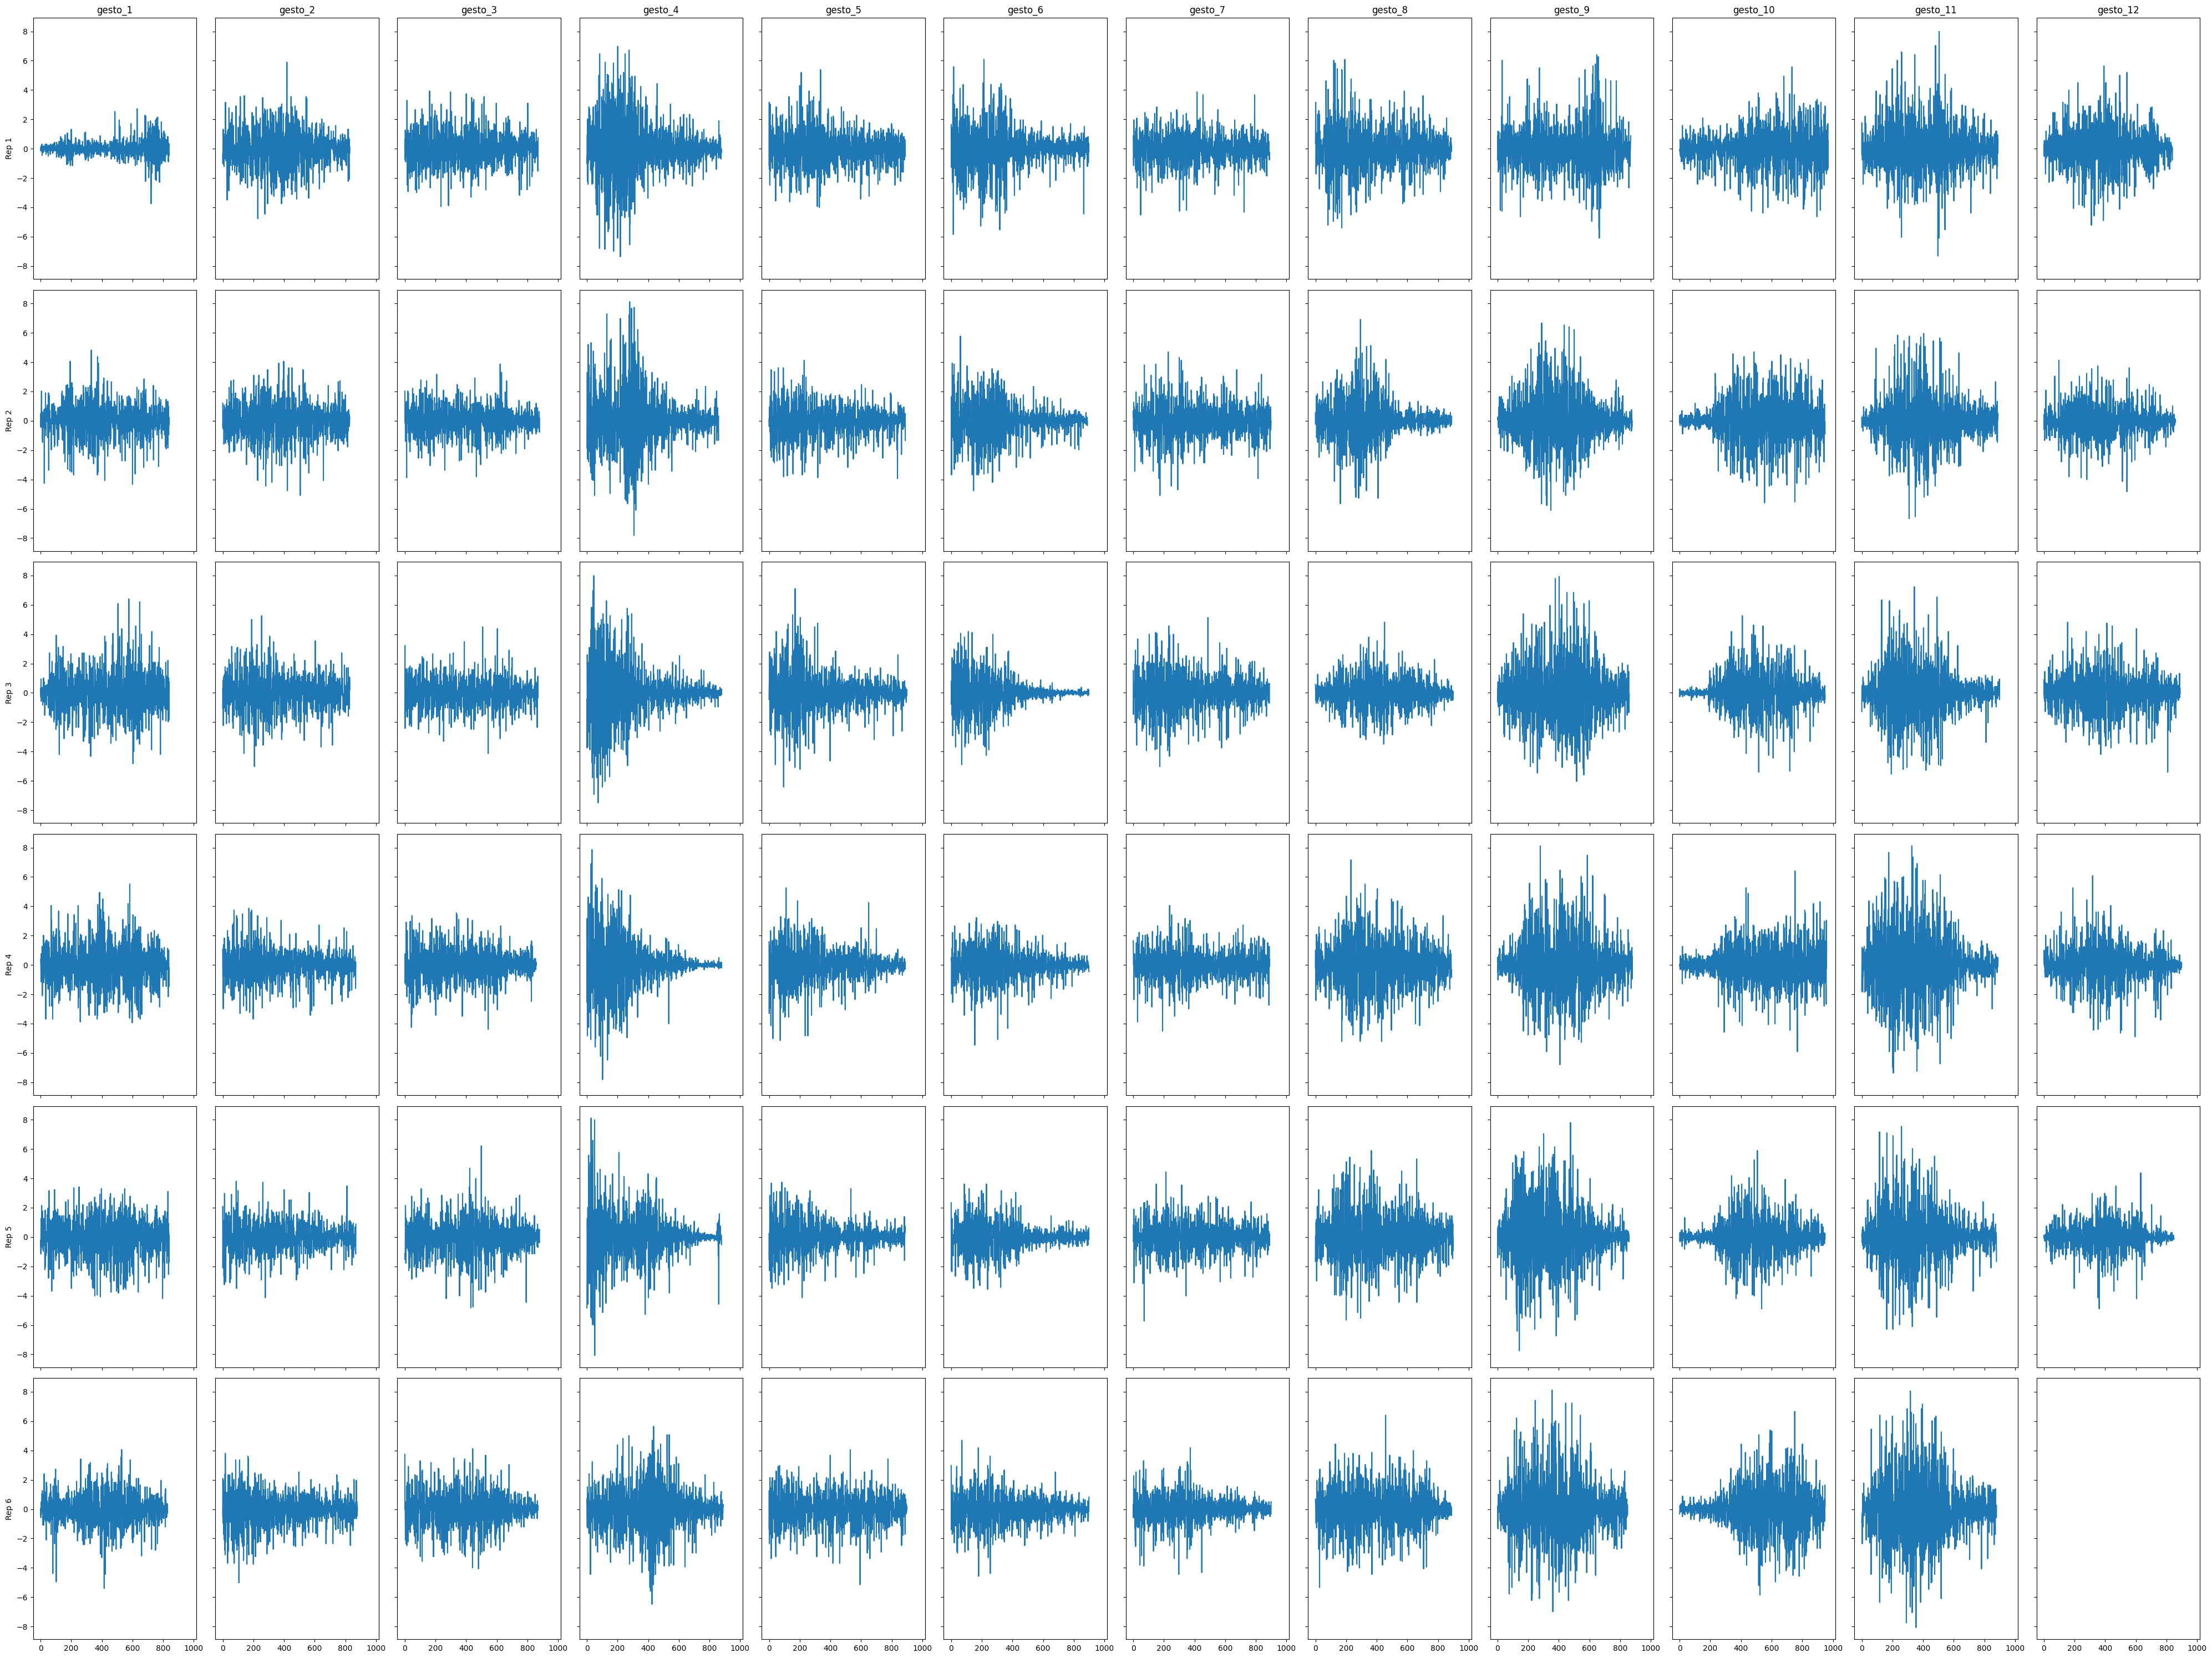

In [ ]:
# Fijando sujeto y canal

# Configuraciones específicas
sujeto_i = "sujeto_2"
canal_m = "canal_1"

# Seleccionamos los datos del sujeto y canal específicos
sujeto_data = data_gesto_sujeto_xrep_dict[sujeto_i]

# Filtrar los gestos para excluir "gesto_0"
sujeto_data_filtered = {k: v for k, v in sujeto_data.items() if k != "gesto_0"}

# Contamos el número de gestos y repeticiones
num_gestos = len(sujeto_data_filtered)
num_repeticiones = max(len(sujeto_data_filtered[gesto]) for gesto in sujeto_data_filtered)

# Crear la figura y los ejes
fig, axes = plt.subplots(num_repeticiones, num_gestos, figsize=(40, 30), sharex=True, sharey=True)

# Iterar sobre los gestos y repeticiones para llenar la matriz de gráficas
for col, (gesto, repeticiones) in enumerate(sujeto_data_filtered.items()):
    for row, (repeticion, canales) in enumerate(repeticiones.items()):
        ax = axes[row, col]
        ax.plot(canales[canal_m])
        if row == 0:
            ax.set_title(gesto)
        if col == 0:
            ax.set_ylabel(f'Rep {row}')

# Ajustar diseño
plt.tight_layout()
plt.show()

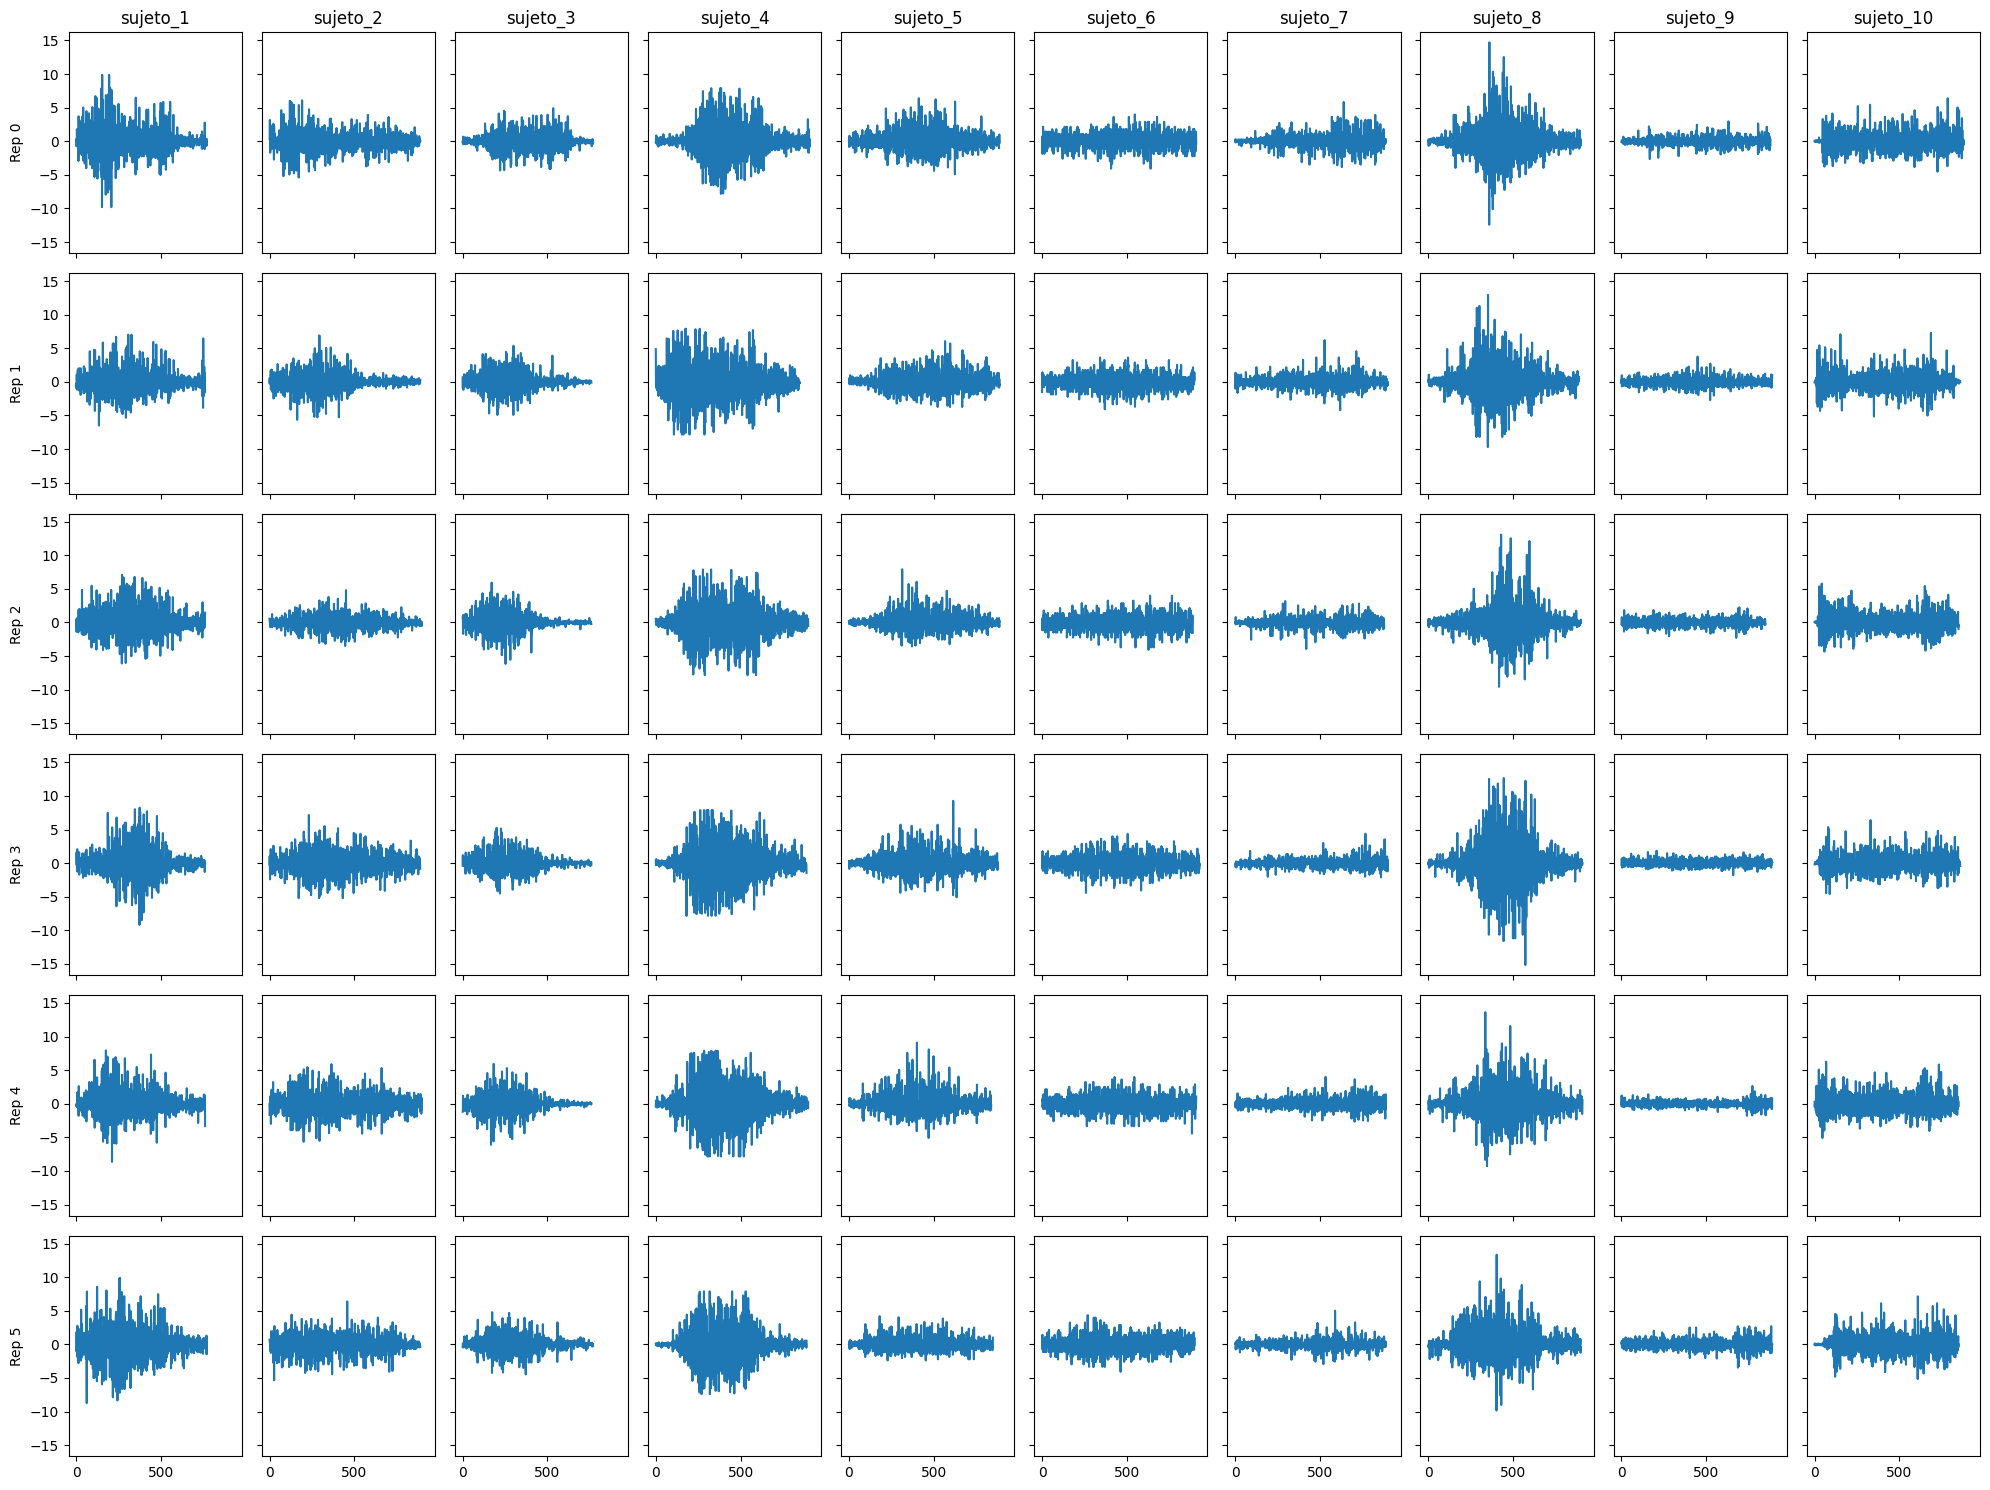

In [ ]:
# Configuraciones específicas
gesto_j = "gesto_8"  # Gesto específico que queremos graficar
canal_m = "canal_1"  # Canal específico que queremos graficar

# Seleccionamos los datos del gesto específico
gesto_data = {sujeto: data[gesto_j] for sujeto, data in data_gesto_sujeto_xrep_dict.items() if gesto_j in data}

# Contamos el número de sujetos y repeticiones
num_sujetos = len(gesto_data)
num_repeticiones = max(len(gesto_data[sujeto]) for sujeto in gesto_data)

# Crear la figura y los ejes
fig, axes = plt.subplots(num_repeticiones, num_sujetos, figsize=(20, 15), sharex=True, sharey=True)

# Iterar sobre los sujetos y repeticiones para llenar la matriz de gráficas
for col, (sujeto, repeticiones) in enumerate(gesto_data.items()):
    for row, (repeticion, canales) in enumerate(repeticiones.items()):
        ax = axes[row, col]
        ax.plot(canales[canal_m])
        if row == 0:
            ax.set_title(sujeto)
        if col == 0:
            ax.set_ylabel(f'Rep {row}')

# Ajustar diseño
plt.tight_layout()
plt.show()

In [ ]:
features_array = np.array(features)
# Crear el nuevo diccionario
features_sep_gesto_sujeto_dict = {}

for sujeto, gestos in sep_gesto_sujeto_dict.items():
    features_sep_gesto_sujeto_dict[sujeto] = {}
    for gesto, ventanas in gestos.items():
        features_sep_gesto_sujeto_dict[sujeto][gesto] = {}
        for ventana, lista in ventanas.items():
            if lista in ventanas_admitidas:
                index = np.where(ventanas_admitidas == lista)[0][0]
                features_sep_gesto_sujeto_dict[sujeto][gesto][ventana] = features_array[index]
joblib.dump(features_sep_gesto_sujeto_dict, "features_sep_gesto_sujeto_dict.pkl")


In [18]:
features_array = np.array(features)
# Nuevo diccionario para guardar las coincidencias
features_sep_gesto_sujeto_xrep_dict = {}

# Función para verificar la coincidencia de filas
def encontrar_filas_coincidentes(arr, ventanas_admitidas):
    coincidencias = []
    for idx, fila in enumerate(arr):
        for jdx, ventana in enumerate(ventanas_admitidas):
            if np.array_equal(fila, ventana):
                coincidencias.append(jdx)
    return coincidencias

# Iterar sobre el diccionario original
for sujeto, gestos in sep_gesto_sujeto_xrep_dict.items():
    if sujeto not in features_sep_gesto_sujeto_xrep_dict:
        features_sep_gesto_sujeto_xrep_dict[sujeto] = {}
    for gesto, repeticiones in gestos.items():
        if gesto not in features_sep_gesto_sujeto_xrep_dict[sujeto]:
            features_sep_gesto_sujeto_xrep_dict[sujeto][gesto] = {}
        for repeticion, numpy_arr_2D in repeticiones.items():
            # Encontrar las posiciones de las filas que coinciden
            filas_coincidentes_indices = encontrar_filas_coincidentes(numpy_arr_2D, ventanas_admitidas)
            # Guardar las filas de "features" que coinciden con estas posiciones
            features_coincidentes = features_array[filas_coincidentes_indices]
            # Asignar al nuevo diccionario
            features_sep_gesto_sujeto_xrep_dict[sujeto][gesto][repeticion] = features_coincidentes
joblib.dump(features_sep_gesto_sujeto_xrep_dict, "features_sep_gesto_sujeto_xrep_dict.pkl")


['features_sep_gesto_sujeto_xrep_dict.pkl']

In [22]:
# levantar los archivos anteriores
features_sep_gesto_sujeto_dict = joblib.load("features_sep_gesto_sujeto_dict.pkl")
features_sep_gesto_sujeto_xrep_dict = joblib.load("features_sep_gesto_sujeto_xrep_dict.pkl")

In [25]:
a = features_sep_gesto_sujeto_xrep_dict["sujeto_2"]["gesto_3"]


In [28]:
import random

# Seleccionar el sujeto
sujeto = "sujeto_1"
gestos = features_sep_gesto_sujeto_dict[sujeto].keys()

# Función para graficar las ventanas y la media
def graficar_gesto(gesto, ventanas, n_ventanas=9):
    # Seleccionar n ventanas aleatorias
    ventanas_keys = list(ventanas.keys())
    ventanas_seleccionadas = random.sample(ventanas_keys, min(n_ventanas, len(ventanas_keys)))

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()

    # Graficar las ventanas seleccionadas
    for i, ventana in enumerate(ventanas_seleccionadas):
        axs[i].plot(ventanas[ventana])
        axs[i].set_title(f'{ventana}')

    # Calcular la media y la desviación estándar
    features_arrays = np.array([ventanas[key] for key in ventanas_keys])
    mean_array = np.mean(features_arrays, axis=0)
    std_array = np.std(features_arrays, axis=0)

    # Graficar la media
    axs[9].plot(mean_array, label='Media')
    axs[9].plot(mean_array + std_array, 'r--', label='Media + Desviación Estándar')
    axs[9].set_title('Media y Desviación Estándar')
    axs[9].legend()

    plt.suptitle(f'Gesto: {gesto}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Iterar sobre los gestos y graficar
for gesto in gestos:
    ventanas = features_sep_gesto_sujeto_dict[sujeto][gesto]
    graficar_gesto(gesto, ventanas)

Output hidden; open in https://colab.research.google.com to view.

# Cálculo y visualización de ventanas promedio

In [ ]:
# 1) Para cada sujeto y gesto, obtener una señal promedio
sigs_prom = []  # primer indice-->sujeto. segundo indice--> gesto, tercer indice--> canal
for i in range(cant_sujetos):
  sigs_prom_sujeto = []
  for j in range(cant_gestos):
    array_3d = np.array(data_gesto_sujeto[i][j])
    sigs_prom_sujeto.append(np.mean(array_3d, axis=0))
  sigs_prom.append(sigs_prom_sujeto)


In [ ]:
# # primer subindice sujeto, segundo gesto, (40,16)--> puedo elegir canal
# b = sigs_prom[0][0]

In [ ]:
# lo paso a formato diccionario
sigs_prom_dict = {}

# Llenamos el diccionario con los datos de la lista anidada
for i in range(cant_sujetos):  # 10 sujetos
    sujeto_key = f"sujeto_{i+1}"
    sigs_prom_dict[sujeto_key] = {}
    for j in range(cant_gestos):  # 13 gestos
        gesto_key = f"gesto_{j}"
        # Asignamos la lista de arreglos al diccionario correspondiente
        sigs_prom_dict[sujeto_key][gesto_key] = sigs_prom[i][j]

In [ ]:
# d = sigs_prom_dict["sujeto_1"]["gesto_4"]

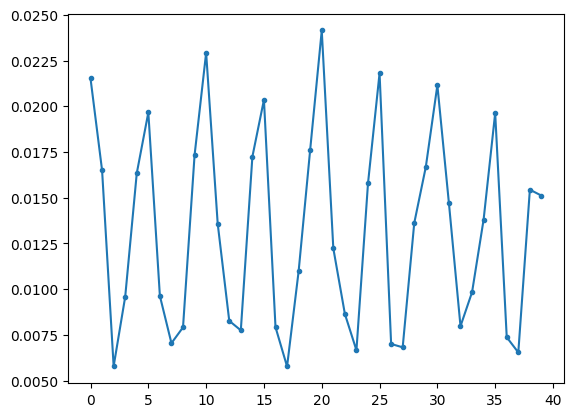

In [ ]:
plt.figure()
plt.plot(sigs_prom_dict["sujeto_1"]["gesto_0"][:, 1], '.-')

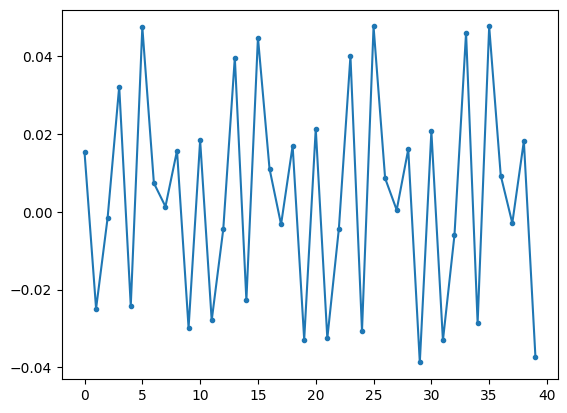

In [ ]:
plt.figure()
plt.plot(sigs_prom_dict["sujeto_1"]["gesto_1"][:, 0], '.-')

# Backup

In [ ]:
# Creamos diccionarios vacíos para almacenar los datos
data_gesto_sujeto_dict = {}
sep_gesto_sujeto_dict = {}

# Llenamos los diccionarios con los datos de las listas anidadas
for i in range(cant_sujetos):  # 10 sujetos
    sujeto_key = f"sujeto_{i+1}"
    data_gesto_sujeto_dict[sujeto_key] = {}
    sep_gesto_sujeto_dict[sujeto_key] = {}
    for j in range(cant_gestos):  # 13 gestos
        gesto_key = f"gesto_{j}"
        data_gesto_sujeto_dict[sujeto_key][gesto_key] = {}
        sep_gesto_sujeto_dict[sujeto_key][gesto_key] = {}
        for k, ventana in enumerate(data_gesto_sujeto[i][j]):  # Cada ventana dentro de un gesto
            ventana_key = f"ventana_{k}"
            data_gesto_sujeto_dict[sujeto_key][gesto_key][ventana_key] = {}
            if isinstance(ventana, np.ndarray) and ventana.ndim == 2 and ventana.shape[1] == 16:  # Comprobamos que es un array 2D con 16 columnas
                for c in range(16):  # 16 canales
                    canal_key = f"canal_{c+1}"
                    # Asignamos cada columna del arreglo (40, 16) a una clave de canal
                    data_gesto_sujeto_dict[sujeto_key][gesto_key][ventana_key][canal_key] = ventana[:, c]
            else:
                print(f"Advertencia: La ventana en data_gesto_sujeto[{i}][{j}][{k}] no es un arreglo 2D con 16 columnas")

        for k, ventana in enumerate(sep_gesto_sujeto[i][j]):  # Cada ventana dentro de un gesto
            ventana_key = f"ventana_{k}"
            sep_gesto_sujeto_dict[sujeto_key][gesto_key][ventana_key] = ventana